In [1]:
from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm

import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras import datasets, layers, models
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
%matplotlib inline

Using TensorFlow backend.


In [2]:
dfPokemon = pd.read_csv("pokemon.csv")
dfPokemon.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [3]:
def createType(row):
    if row['Type2']=='None':
        return row['Type1']
    return '-'.join([row['Type1'], row['Type2']])

In [4]:
dfPokemon['Type2'].fillna('None', inplace=True)
dfPokemon['Type'] = dfPokemon.apply(lambda row: createType(row), axis=1)
dfPokemon.head()

,Name,Type1,Type2,Type
0,bulbasaur,Grass,Poison,Grass-Poison
1,ivysaur,Grass,Poison,Grass-Poison
2,venusaur,Grass,Poison,Grass-Poison
3,charmander,Fire,None,Fire
4,charmeleon,Fire,None,Fire


In [5]:
len(dfPokemon["Type"].unique())
dfPokemon = dfPokemon.sort_values('Name')
dfPokemon.head()

,Name,Type1,Type2,Type
459,abomasnow,Grass,Ice,Grass-Ice
62,abra,Psychic,None,Psychic
358,absol,Dark,None,Dark
616,accelgor,Bug,None,Bug
680,aegislash-blade,Steel,Ghost,Steel-Ghost


(224, 224, 3)


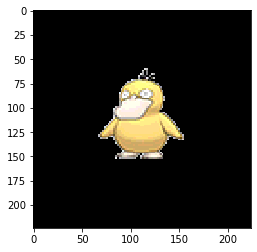

In [6]:
#Let's take a look at some of the images and what they look like
img = mpimg.imread('images/psyduck.png')
print(img.shape)
plt.imshow(img)

In [7]:
from os import listdir
from os.path import isfile, join
filenames = [f for f in listdir('images') if isfile(join('images', f))]

In [8]:
onehotencoder = OneHotEncoder() 
y = onehotencoder.fit_transform((dfPokemon['Type1'].to_numpy()).reshape(-1, 1)).toarray() 

In [9]:
def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(224, 224))
    rgb_im = img.convert('RGB')
    rgb_im.save(img_path)
    img_tensor = image.img_to_array(rgb_im)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    
    if show:
        plt.imshow(img_tensor[0]/255)
        plt.axis('off')
        plt.show()
        
    return img_tensor
    
data = []
for i in filenames:
    data.append(load_image('images/' + i))
    
X = data
X_train_list, X_test_list, y_train_list, y_test_list = train_test_split(X,y, test_size = 0.25)

In [10]:
X_test_pre = np.asarray(X_test_list, dtype=np.float32)
y_test = np.asarray(y_test_list, dtype=np.float32)

X_train_pre = np.asarray(X_train_list, dtype=np.float32)
y_train_1 = np.asarray(y_train_list, dtype=np.float32)


X_train_d = []
for i in range(len(X_train_pre)):
    X_train_d.append(X_train_pre[i][0])
    
X_test_d = []
for i in range(len(X_test_pre)):
    X_test_d.append(X_test_pre[i][0])
    
X_train_1 = np.asarray(X_train_d, dtype=np.float32)
X_test = np.asarray(X_test_d, dtype=np.float32)

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_1,y_train_1, test_size = 0.25)

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(18, activation='softmax', name='visualized_layer'))

model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['categorical_accuracy'])


In [29]:
callback = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, epochs=100, batch_size=256, callbacks=[callback], validation_data=(X_valid,y_valid))

Train on 454 samples, validate on 152 samples
Epoch 1/100
454/454 [==============================] - 51s 112ms/step - loss: 143.0782 - categorical_accuracy: 0.0595 - val_loss: 226.7228 - val_categorical_accuracy: 0.0658
Epoch 2/100
454/454 [==============================] - 37s 82ms/step - loss: 161.4245 - categorical_accuracy: 0.0991 - val_loss: 29.5528 - val_categorical_accuracy: 0.1711
Epoch 3/100
454/454 [==============================] - 34s 76ms/step - loss: 21.4872 - categorical_accuracy: 0.1256 - val_loss: 7.7339 - val_categorical_accuracy: 0.0329
Epoch 4/100
454/454 [==============================] - 37s 81ms/step - loss: 5.1987 - categorical_accuracy: 0.1278 - val_loss: 3.5534 - val_categorical_accuracy: 0.0461
Epoch 5/100
454/454 [==============================] - 38s 84ms/step - loss: 2.2504 - categorical_accuracy: 0.3238 - val_loss: 3.1396 - val_categorical_accuracy: 0.0987
Epoch 6/100
454/454 [==============================] - 35s 76ms/step - loss: 1.8501 - categorical_ac

In [31]:
res = model.evaluate(X_test, y_test)

203/203 [==============================] - 3s 15ms/step
[9.244676251716802, 0.1034482792019844]


In [32]:
squirtle_prediction = model.predict(load_image('images/squirtle.png'))
types = dfPokemon["Type1"].to_numpy()
max_index = np.where(squirtle_prediction[0] == np.amax(squirtle_prediction[0]))

types[max_index]

array(['Poison'], dtype=object)

In [33]:
charmander_prediction = model.predict(load_image('images/charmander.png'))
types = dfPokemon["Type1"].to_numpy()
max_index = np.where(charmander_prediction[0] == np.amax(charmander_prediction[0]))

types[max_index]

array(['Electric'], dtype=object)

In [35]:
from vis.visualization import visualize_cam, overlay
from vis.utils import utils
from keras import activations
from vis.visualization import visualize_activation
    

layer_index = utils.find_layer_idx(model, 'visualized_layer')
model.layers[layer_index].activation = activations.linear
model = utils.apply_modifications(model)  
img = visualize_activation(model, layer_index, filter_indices=layer_index)

indices_to_visualize = [ 0, 12, 38 ]

Text(0.5, 1.0, 'Grad-CAM')

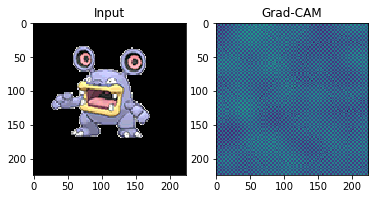

In [38]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(X_train[2]/255, cmap='gray') 
axes[0].set_title('Input')
axes[1].imshow(img[..., 2])
axes[1].set_title('Grad-CAM')

In [60]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=X_train.shape[1:]))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))  #Dropout for regularization
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [62]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [14]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10,
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        verbose=2,
    )
    fitted_model = gs.fit(X_train_data, y_train_data)

    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)

    return fitted_model, pred

In [15]:
def build_cnn(activation = 'relu',
              dropout_rate = 0.2,
              optimizer = 'Adam'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(56, activation='relu'))
    model.add(layers.Dense(18, activation='softmax', name='visualized_layer'))

    model.compile(
        loss='categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    
    return model

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
              'epochs':[1, 3, 5],
              'batch_size':[32, 128],
#               'epochs': [100,150,200],
#               'batch_size' : [32, 128],
#               'optimizer' : ['Adam', 'Nadam'],
#               'dropout_rate' : [0.2, 0.3],
              'activation' :['relu', 'elu']
             }

model = KerasClassifier(build_fn = build_cnn, verbose=0)

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                        param_grid, cv=5)

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 113.8min finished


0.10786325186491012
{'activation': 'elu', 'batch_size': 32, 'epochs': 3}


In [17]:
print(model.best_score_)
print(model.best_params_)


0.10786325186491012
{'activation': 'elu', 'batch_size': 32, 'epochs': 3}
